In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import warnings
import io
warnings.filterwarnings("ignore")

SUB = Time Asleep - (SQ * Time in bed)

Time in bed = (TA - SUB)/SQ

In [ ]:
df = pd.read_csv('sleepdata_2.csv')

df = df.drop(['Start','End','Movements per hour'],axis=1)

df['Sub'] = df['Time asleep (seconds)']-df['SQ*in_bed']

df = df[df['Time asleep (seconds)']>10000]

df['Sleep Quality'] = df['Sleep Quality'].str.rstrip('%').astype('float') / 100.0
df['Time Debt'] = np.zeros(len(df))

for i in range(len(df)-7):
  df['Time Debt'][i] = 176400-df['Time asleep (seconds)'][i+1:i+8].sum()

df['Time Debt'].mean()
df

,Sleep Quality,Steps,Time in bed (seconds),Time asleep (seconds),SQ*in_bed,Sub,Time Debt
0,0.60,8350,24289.2,22993.8,14573.520,8420.280,8955.8
1,0.73,4746,28810.2,25160.9,21031.446,4129.454,8190.8
2,0.86,4007,30461.5,28430.8,26196.890,2233.910,12860.2
3,0.77,6578,25327.6,23132.5,19502.252,3630.248,9389.6
4,0.78,4913,25698.4,22614.6,20044.752,2569.848,9813.5
...,...,...,...,...,...,...,...
914,0.82,4675,25122.6,21689.2,20600.532,1088.668,0.0
915,0.72,2521,27162.0,25079.6,19556.640,5522.960,0.0
916,0.71,3903,24474.1,20803.0,17376.611,3426.389,0.0
918,0.77,456,21433.6,15860.8,16503.872,-643.072,0.0


In [ ]:
X_test = df[['Sleep Quality','Steps']][:150]
Y_test = df[:150]['Sub']
X_train = df[['Sleep Quality','Steps']][150:].reset_index().drop(['index'],axis = 1)
Y_train = df[150:]['Sub'].reset_index().drop(['index'],axis = 1)
X_train

,Sleep Quality,Steps
0,0.95,4046
1,0.68,3140
2,0.94,3381
3,1.00,3453
4,0.93,6132
...,...,...
757,0.82,4675
758,0.72,2521
759,0.71,3903
760,0.77,456


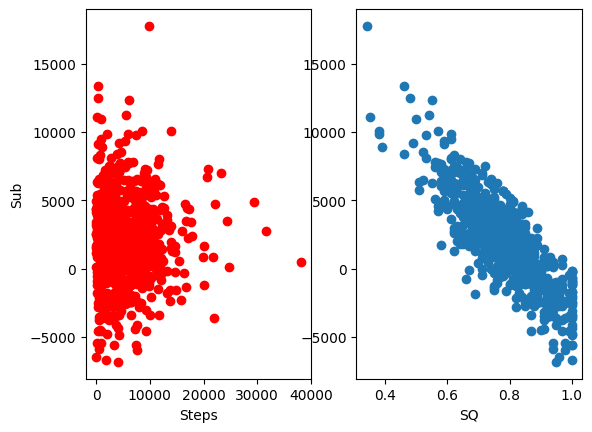

In [ ]:
fig, ax = plt.subplots(1,2)
ax[1].scatter(X_train['Sleep Quality'],Y_train)
ax[0].scatter(X_train['Steps'],Y_train,c='r')
ax[0].set_xlabel('Steps')
ax[1].set_xlabel('SQ')
ax[0].set_ylabel('Sub')
plt.show()

In [ ]:
#normalizing data
print(X_train.mean())
X_norm = (X_train - X_train.mean())/X_train.mean()
X_test_norm = (X_test - X_test.mean())/X_test.mean()
X_test_norm

Sleep Quality       0.782244
Steps            5358.262467
dtype: float64


,Sleep Quality,Steps
0,-0.248183,0.647424
1,-0.085289,-0.063632
2,0.077604,-0.209434
3,-0.035168,0.297815
4,-0.022638,-0.030684
...,...,...
145,0.077604,-0.222850
146,0.253028,-0.348725
147,0.090134,-0.338663
148,0.202907,0.383244


In [ ]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm,Y_train)

SGDRegressor(max_iter=10000)

In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(w_norm,b_norm)

[-17431.98307057     20.56110386] [2029.03513834]


In [ ]:
y_pred = sgdr.predict(X_test_norm)
print(Y_test[:5])
print(y_pred[:5])

0    8420.280
1    4129.454
2    2233.910
3    3630.248
4    2569.848
Name: Sub, dtype: float64
[6368.67064203 3514.49103428  671.93366784 2648.21215725 2423.0302152 ]


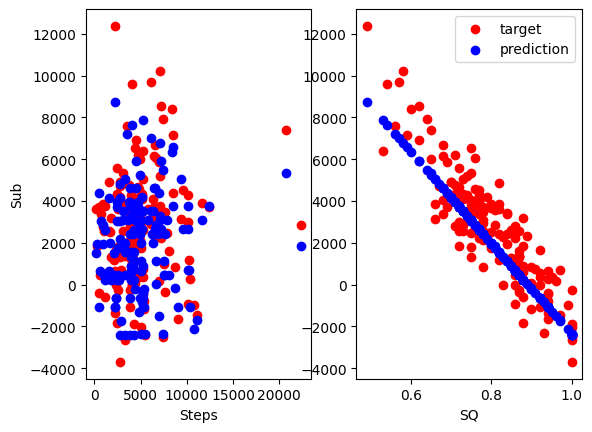

In [ ]:
fig, ax = plt.subplots(1,2)
ax[1].scatter(X_test['Sleep Quality'],Y_test,c='r',label='target')
ax[1].scatter(X_test['Sleep Quality'],y_pred,c='b',label='prediction')
ax[0].scatter(X_test['Steps'],Y_test,c='r')
ax[0].scatter(X_test['Steps'],y_pred,c='b')
ax[0].set_xlabel('Steps')
ax[1].set_xlabel('SQ')
ax[0].set_ylabel('Sub')
plt.legend()
plt.show()

In [ ]:
sq = float(input("Sleep Quality:"))
steps = int(input("Steps:"))

x_input = np.array([sq,steps]).reshape(-1,2)
x_input_norm = np.zeros((2,2))
x_input_norm[0,0] = (x_input[0,0]-0.782244)/0.782244
x_input_norm[0,1] = (x_input[0,1]-5358.262467)/5358.262467

time_in_bed = (25000-sgdr.predict(x_input_norm)[0])/x_input[0,0]
print("You need to sleep for:", round(time_in_bed/3600,2), "hours")

Sleep Quality:.90
Steps:12000
You need to sleep for: 7.89 hours
